# **PERCEPTRON**

this script is for setup, execution, and evaluation of the perceptron algorithm

In [3]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import funcs as f
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_score

In [57]:
'''
Set clf, import data from data_organization.ipynb, and set random seed

'''
clf = Perceptron(max_iter=1000000)

df_all = pd.read_csv('../data/df_all.csv').drop('Unnamed: 0', axis = 1)
df_gus = pd.read_csv('../data/df_gus.csv').drop('Unnamed: 0', axis = 1)
df_tgus = pd.read_csv('../data/df_tgus.csv').drop('Unnamed: 0', axis = 1)
df_tgus_st = pd.read_csv('../data/df_tgus*.csv').drop('Unnamed: 0', axis = 1)
df_raw = pd.read_csv('../data/df_raw.csv').drop('Unnamed: 0', axis = 1)

np.random.seed(8)

(-1.0, 1.0)

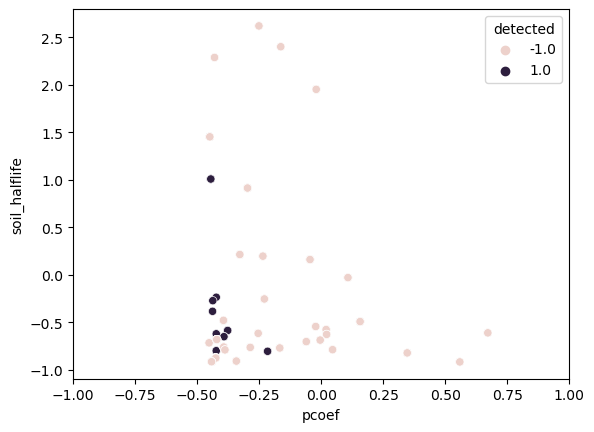

In [5]:
sns.scatterplot(x='pcoef', y='soil_halflife', hue='detected', data = df_all)
plt.xlim(-1,1)

<AxesSubplot:xlabel='Poorly drained', ylabel='Well drained'>

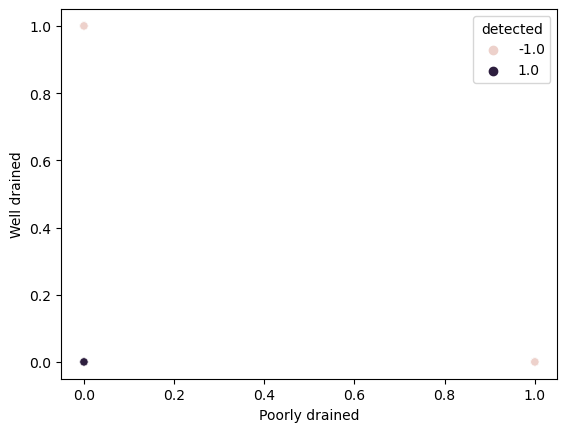

In [6]:
sns.scatterplot(x = 'Poorly drained', y = 'Well drained', hue = 'detected', data = df_all)

In [61]:
'''
Considering GUS, TGUS,  TGUS*, and raw values with other features

'''
all_w, all_train_acc, all_val_acc, all_test_acc = f.kfold_crossval(df_all, clf, 'perceptron')
print('All - Results:')
print(f'Best Training Accuracy: {all_train_acc}%')
print(f'Best Validation Accuracy: {all_val_acc}%')
print(f'Test Accuracy: {all_test_acc}%\n')


All - Results:
Best Training Accuracy: 91.0%
Best Validation Accuracy: 96.0%
Test Accuracy: 94.0%



In [18]:
'''
Considering just GUS with other features

'''
gus_w, gus_train_acc, gus_val_acc, gus_test_acc = f.kfold_crossval(df_gus, clf, 'perceptron')
print('GUS - Results:')
print(f'Best Training Accuracy: {gus_train_acc}%')
print(f'Best Validation Accuracy: {gus_val_acc}%')
print(f'Test Accuracy: {gus_test_acc}%\n')

GUS - Results:
Best Training Accuracy: 88.0%
Best Validation Accuracy: 90.57%
Test Accuracy: 91.51%



In [36]:
'''
Considering just TGUS with other features

'''
tgus_w, tgus_train_acc, tgus_val_acc, tgus_test_acc = f.kfold_crossval(df_tgus, clf, 'perceptron')
print('TGUS - Results:')
print(f'Best Training Accuracy: {tgus_train_acc}%')
print(f'Best Validation Accuracy: {tgus_val_acc}%')
print(f'Test Accuracy: {tgus_test_acc}%\n')

TGUS - Results:
Best Training Accuracy: 87.0%
Best Validation Accuracy: 92.45%
Test Accuracy: 92.45%



In [41]:
'''
Considering just TGUS* and raw values with other features

'''
tgus_st_w, tgus_st_train_acc, tgus_st_val_acc, tgus_st_test_acc = f.kfold_crossval(df_tgus_st, clf, 'perceptron')
print('TGUS* - Results:')
print(f'Best Training Accuracy: {tgus_st_train_acc}%')
print(f'Best Validation Accuracy: {tgus_st_val_acc}%')
print(f'Test Accuracy: {tgus_st_test_acc}%\n')

TGUS* - Results:
Best Training Accuracy: 86.0%
Best Validation Accuracy: 92.45%
Test Accuracy: 91.51%



In [54]:
'''
Considering just raw values with other features

'''
aw_w, raw_train_acc, raw_val_acc, raw_test_acc = f.kfold_crossval(df_raw, clf, 'perceptron')
print('Raw - Results:')
print(f'Best Training Accuracy: {raw_train_acc}%')
print(f'Best Validation Accuracy: {raw_val_acc}%')
print(f'Test Accuracy: {raw_test_acc}%\n')

Raw - Results:
Best Training Accuracy: 91.0%
Best Validation Accuracy: 94.0%
Test Accuracy: 92.0%



In [146]:
'''
Considering just raw values with other features

'''
df_raw=df_raw.sample(frac=1) 
train_proportion = 0.8 
n = len(df_raw)
t = int(train_proportion * n)

# separate training and test sets
y = df_raw['detected']
X = df_raw.loc[:, ~df_raw.columns.isin(['detected'])]

#features in training set
train_x = X.iloc[:t,:].reset_index().iloc[:,1:]
#features in test set
test_x = X.iloc[t:,:].reset_index().iloc[:,1:]
#targets in train set
train_y = pd.Series(y[:t].reset_index().iloc[:,1:].iloc[:,0])
#targets in test set
test_y = pd.Series(y[t:].reset_index().iloc[:,1:].iloc[:,0])

from sklearn.model_selection import KFold
kf = KFold(n_splits=8)
clf = Perceptron(max_iter=1000000)

# perform K-fold cross validation
avg_accuracy = []
KFold(n_splits=8, random_state=None, shuffle=False)
for i, (train_index, val_index) in enumerate(kf.split(train_x)):
    # separate split training set to get validation
    xt = train_x.loc[train_index,:].reset_index().iloc[:,1:]
    yt = pd.Series(train_y.loc[train_index].reset_index().iloc[:,1:].iloc[:,0])
    xv = train_x.loc[val_index,:].reset_index().iloc[:,1:]
    yv = pd.Series(train_y.loc[val_index].reset_index().iloc[:,1:].iloc[:,0])

    # run perceptron
    clf.fit(xt,yt)
    train_score = round(clf.score(xt, yt),2) * 100
    w = clf.coef_

    # test weights on validation set with 0-1 loss
    acc = f.zero_one_loss(xv,yv,w)
    avg_accuracy = np.append(acc, avg_accuracy)

    # keep best weight vector
    if acc >= np.max(avg_accuracy):
        w_best = w
        best_train_score = train_score
        best_val_score = acc

# now run 0-1 loss on remaining test set
test_acc = f.zero_one_loss(test_x, test_y, w_best)

print('Raw - Results:')
print(f'Best Training Accuracy: {best_train_score}%')
print(f'Best Validation Accuracy: {best_val_score}%')
print(f'Test Accuracy: {test_acc}%')



Raw - Results:
Best Training Accuracy: 90.0%
Best Validation Accuracy: 96.15%
Test Accuracy: 90.57%


In [2]:
'''
GUS

- run perceptron for 100 different random combinations of train/test
- save the best weight vector and use it later

NOTE: still need to consider training error when extracting best weight vector

'''
#run the test for 30 different random numbers at np.random.seed()
avg_accuracy = []
for i in range(100):
    np.random.seed(8)
    df_gus=df_gus.sample(frac=1) 
    train_proportion = 0.8 
    n = len(df_gus)
    t = int(train_proportion * n)

    #separate features and detected
    detected = df_gus['detected']
    features = df_gus.loc[:, ~df_gus.columns.isin(['detected'])]

    #features in training set
    train_x = features.iloc[:t,:].reset_index().iloc[:,1:]
    #features in test set
    test_x = features.iloc[t:,:].reset_index().iloc[:,1:]
    #targets in train set
    train_y = detected[:t].reset_index().iloc[:,1:]
    #targets in test set
    test_y = detected[t:].reset_index().iloc[:,1:]


    '''
    run perceptron!
    '''
    w = f.perceptron(X=train_x, y = train_y)# maxchecks= 50000, maxiters = 50000)#, maxchecks = 500000, maxiters = 500000)


    '''
    calculate losses
    '''
    losses = 0
    test_losses = 0
    train_losses = 0
    for idx, row in test_x.iterrows():
        result = f.sign(np.dot(w, row))

        if result != test_y.iloc[idx,0]:
            losses += 1

    avg_accuracy = np.append(round((1 - losses / len(test_x)) * 100, 2), avg_accuracy)

    # keep best weight vector
    if avg_accuracy[0] >= np.max(avg_accuracy):
        w_best_gus = w

print('GUS Results:')
print('Average Accuracy: ' + str(round(np.mean(avg_accuracy),2)) + '%' )
print('Highest Accuracy: ' + str(round(np.max(avg_accuracy),2)) + '%' )
print('Lowest Accuracy: ' + str(round(np.min(avg_accuracy),2)) + '%' )
    

GUS Results:
Average Accuracy: 84.29%
Highest Accuracy: 95.12%
Lowest Accuracy: 46.34%


In [3]:
'''
TGUS

- run perceptron for 100 different random combinations of train/test
- save the best weight vector and use it later

NOTE: still need to consider training error when extracting best weight vector

'''
#run the test for 30 different random numbers at np.random.seed()
avg_accuracy = []
for i in range(100):
    np.random.seed(8)
    df_tgus=df_tgus.sample(frac=1) 
    train_proportion = 0.8 
    n = len(df_tgus)
    t = int(train_proportion * n)

    #separate features and detected
    detected = df_tgus['detected']
    features = df_tgus.loc[:, ~df_tgus.columns.isin(['detected'])]

    #features in training set
    train_x = features.iloc[:t,:].reset_index().iloc[:,1:]
    #features in test set
    test_x = features.iloc[t:,:].reset_index().iloc[:,1:]
    #targets in train set
    train_y = detected[:t].reset_index().iloc[:,1:]
    #targets in test set
    test_y = detected[t:].reset_index().iloc[:,1:]


    '''
    run perceptron!
    '''
    w = f.perceptron(X=train_x, y = train_y)# maxchecks= 50000, maxiters = 50000)#, maxchecks = 500000, maxiters = 500000)


    '''
    calculate losses
    '''
    losses = 0
    test_losses = 0
    train_losses = 0
    for idx, row in test_x.iterrows():
        result = f.sign(np.dot(w, row))

        if result != test_y.iloc[idx,0]:
            losses += 1

    avg_accuracy = np.append(round((1 - losses / len(test_x)) * 100, 2), avg_accuracy)

    # keep best weight vector
    if avg_accuracy[0] >= np.max(avg_accuracy):
        w_best_tgus = w

print('TGUS Results:')
print('Average Accuracy: ' + str(round(np.mean(avg_accuracy),2)) + '%' )
print('Highest Accuracy: ' + str(round(np.max(avg_accuracy),2)) + '%' )
print('Lowest Accuracy: ' + str(round(np.min(avg_accuracy),2)) + '%' )
    

TGUS Results:
Average Accuracy: 83.22%
Highest Accuracy: 93.9%
Lowest Accuracy: 36.59%


In [4]:
'''
TGUS*

- run perceptron for 100 different random combinations of train/test
- save the best weight vector and use it later

NOTE: still need to consider training error when extracting best weight vector

'''
#run the test for 30 different random numbers at np.random.seed()
avg_accuracy = []
for i in range(100):
    np.random.seed(8)
    df_tgus_st=df_tgus_st.sample(frac=1) 
    train_proportion = 0.8 
    n = len(df_tgus_st)
    t = int(train_proportion * n)

    #separate features and target
    detected = df_tgus_st['detected']
    features = df_tgus_st.loc[:, ~df_gus.columns.isin(['detected'])]

    #features in training set
    train_x = features.iloc[:t,:].reset_index().iloc[:,1:]
    #features in test set
    test_x = features.iloc[t:,:].reset_index().iloc[:,1:]
    #targets in train set
    train_y = detected[:t].reset_index().iloc[:,1:]
    #targets in test set
    test_y = detected[t:].reset_index().iloc[:,1:]


    '''
    run perceptron!
    '''
    w = f.perceptron(X=train_x, y = train_y)# maxchecks= 50000, maxiters = 50000)#, maxchecks = 500000, maxiters = 500000)


    '''
    calculate losses
    '''
    losses = 0
    test_losses = 0
    train_losses = 0
    for idx, row in test_x.iterrows():
        result = f.sign(np.dot(w, row))

        if result != test_y.iloc[idx,0]:
            losses += 1

    avg_accuracy = np.append(round((1 - losses / len(test_x)) * 100, 2), avg_accuracy)

    # keep best weight vector
    if avg_accuracy[0] >= np.max(avg_accuracy):
        w_best_tgus_st = w

print('TGUS* Results:')
print('Average Accuracy: ' + str(round(np.mean(avg_accuracy),2)) + '%' )
print('Highest Accuracy: ' + str(round(np.max(avg_accuracy),2)) + '%' )
print('Lowest Accuracy: ' + str(round(np.min(avg_accuracy),2)) + '%' )
    

TGUS* Results:
Average Accuracy: 82.72%
Highest Accuracy: 95.12%
Lowest Accuracy: 31.71%


In [5]:
'''
Raw

- run perceptron for 100 different random combinations of train/test
- save the best weight vector and use it later

NOTE: still need to consider training error when extracting best weight vector

'''
#run the test for 30 different random numbers at np.random.seed()
avg_accuracy = []
for i in range(100):
    np.random.seed(8)
    df_raw=df_raw.sample(frac=1) 
    train_proportion = 0.8 
    n = len(df_raw)
    t = int(train_proportion * n)

    #separate features and target
    detected = df_raw['detected']
    features = df_raw.loc[:, ~df_raw.columns.isin(['detected'])]

    #features in training set
    train_x = features.iloc[:t,:].reset_index().iloc[:,1:]
    #features in test set
    test_x = features.iloc[t:,:].reset_index().iloc[:,1:]
    #targets in train set
    train_y = detected[:t].reset_index().iloc[:,1:]
    #targets in test set
    test_y = detected[t:].reset_index().iloc[:,1:]


    '''
    run perceptron!
    '''
    w = f.perceptron(X=train_x, y = train_y)# maxchecks= 50000, maxiters = 50000)#, maxchecks = 500000, maxiters = 500000)


    '''
    calculate losses
    '''
    losses = 0
    test_losses = 0
    train_losses = 0
    for idx, row in test_x.iterrows():
        result = f.sign(np.dot(w, row))

        if result != test_y.iloc[idx,0]:
            losses += 1

    avg_accuracy = np.append(round((1 - losses / len(test_x)) * 100, 2), avg_accuracy)

    # keep best weight vector
    if avg_accuracy[0] >= np.max(avg_accuracy):
        w_best_raw = w

print('Raw Results:')
print('Average Accuracy: ' + str(round(np.mean(avg_accuracy),2)) + '%' )
print('Highest Accuracy: ' + str(round(np.max(avg_accuracy),2)) + '%' )
print('Lowest Accuracy: ' + str(round(np.min(avg_accuracy),2)) + '%' )
    

Raw Results:
Average Accuracy: 84.72%
Highest Accuracy: 96.34%
Lowest Accuracy: 41.46%


In [4]:
'''
All

- run perceptron for 100 different random combinations of train/test
- save the best weight vector and use it later

NOTE: still need to consider training error when extracting best weight vector

'''
#run the test for 30 different random numbers at np.random.seed()
avg_accuracy = []
for i in range(100):
    np.random.seed(8)
    df_all=df_all.sample(frac=1) 
    train_proportion = 0.8 
    n = len(df_all)
    t = int(train_proportion * n)

    #separate features and target
    detected = df_all['detected']
    features = df_all.loc[:, ~df_all.columns.isin(['detected'])]

    #features in training set
    train_x = features.iloc[:t,:].reset_index().iloc[:,1:]
    #features in test set
    test_x = features.iloc[t:,:].reset_index().iloc[:,1:]
    #targets in train set
    train_y = detected[:t].reset_index().iloc[:,1:]
    #targets in test set
    test_y = detected[t:].reset_index().iloc[:,1:]


    '''
    run perceptron!
    '''
    w = f.perceptron(X=train_x, y = train_y)# maxchecks= 50000, maxiters = 50000)#, maxchecks = 500000, maxiters = 500000)


    '''
    calculate losses
    '''
    losses = 0
    test_losses = 0
    train_losses = 0
    for idx, row in test_x.iterrows():
        result = f.sign(np.dot(w, row))

        if result != test_y.iloc[idx,0]:
            losses += 1

    avg_accuracy = np.append(round((1 - losses / len(test_x)) * 100, 2), avg_accuracy)

    # keep best weight vector
    if avg_accuracy[0] >= np.max(avg_accuracy):
        w_best_all = w

print('All Results:')
print('Average Accuracy: ' + str(round(np.mean(avg_accuracy),2)) + '%' )
print('Highest Accuracy: ' + str(round(np.max(avg_accuracy),2)) + '%' )
print('Lowest Accuracy: ' + str(round(np.min(avg_accuracy),2)) + '%' )
    

All Results:
Average Accuracy: 87.75%
Highest Accuracy: 96.34%
Lowest Accuracy: 68.29%


In [16]:
''' 
now test w_best on different test sets of half the data size
'''
post_avg_accuracy = []
for i in range(100):
    np.random.seed(8)
    df_all=df_all.sample(frac=1) 
    train_proportion = .5
    n = len(df_all)
    t = int(train_proportion * n)

    #separate features and target
    detected = df_all['detected']
    features = df_all.loc[:, ~df_all.columns.isin(['detected'])]

    #features in test set
    post_test_x = features.iloc[t:,:].reset_index().iloc[:,1:]
    #targets in test set
    post_test_y = detected[t:].reset_index().iloc[:,1:]

    '''
    calculate losses
    '''
    #0-1 loss
    losses = 0
    for idx, row in post_test_x.iterrows():
        result = f.sign(np.dot(w_best_all, row))

        if result != post_test_y.iloc[idx,0]:
            losses += 1
            
    post_avg_accuracy = np.append(round((1 - losses / len(post_test_x)) * 100, 2), post_avg_accuracy)
    
print('Average Accuracy: ' + str(round(np.mean(post_avg_accuracy),2)) + '%' )
print('Highest Accuracy: ' + str(round(np.max(post_avg_accuracy),2)) + '%' )
print('Lowest Accuracy: ' + str(round(np.min(post_avg_accuracy),2)) + '%' )


Average Accuracy: 87.9%
Highest Accuracy: 91.63%
Lowest Accuracy: 84.73%
